In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from numpy import sin,cos,sinh,cosh,exp
from math import pi
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [2]:
def prepPlot(alphas):
    plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
    mp.rcParams.update({'font.size': 15})
    cnorm = mp.colors.Normalize(vmin=0,vmax=len(alphas))
    scalarMap = mp.cm.ScalarMappable(norm=cnorm,cmap=plt.get_cmap('tab10')) 
    colorList = [mp.colors.rgb2hex(scalarMap.to_rgba(i)) for i in range(len(alphas))]
    colorBar = plt.contourf([[0,0],[0,0]], list(range(len(alphas)+1)), \
               cmap=mp.colors.ListedColormap(colorList))
    plt.clf()

    plt.title('H in H2O Scattering Law (Direct Method)')
    plt.xlabel('beta'); plt.ylabel('S(a,b) (Non-symmetric)'); plt.yscale('log')

    cbar = plt.colorbar(colorBar);     cbar.ax.get_yaxis().set_ticks([])
    cbar.ax.get_yaxis().labelpad = 40; cbar.ax.set_ylabel('alpha')
    for j, lab in enumerate(["    "+str(a) for a in alphas[:]]):
        cbar.ax.text(1.7,(2*j+1)/len(alphas), lab, ha='center', va='center')
    return scalarMap


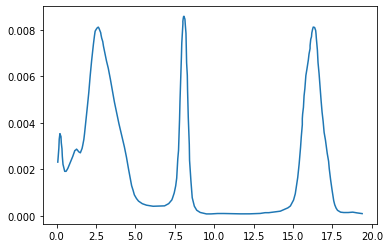

In [3]:
rho_energies = [ 0.0020301, 0.0037546, 0.0043421, 0.0054803, 0.0071531, 0.0076952, 0.0087993, 0.0093379, 0.010435, 0.011548, 0.013213, 0.015464, 0.018276, 0.020525, 0.023901, 0.026159, 0.027850, 0.029541, 0.031229, 0.032357, 0.034022, 0.035708, 0.038503, 0.039637, 0.041329, 0.042458, 0.044150, 0.045291, 0.047007, 0.049860, 0.052143, 0.054446, 0.056727, 0.059582, 0.061284, 0.062428, 0.064112, 0.065798, 0.067487, 0.068601, 0.069718, 0.071398, 0.071946, 0.073058, 0.074730, 0.075836, 0.078060, 0.080831, 0.083626, 0.086955, 0.089729, 0.093618, 0.096944, 0.10084, 0.10418, 0.10696, 0.10970, 0.11308, 0.11640, 0.11912, 0.12140, 0.12366, 0.125840, 0.129285, 0.132592, 0.138713, 0.145400, 0.156194, 0.174679, 0.176866, 0.181339, 0.186439, 0.187581, 0.190318, 0.19269, 0.19433, 0.19497, 0.19608, 0.19729, 0.19779, 0.19894, 0.19963, 0.20079, 0.20192, 0.20254, 0.20438, 0.20430, 0.20481, 0.20544, 0.20603, 0.20764, 0.20823, 0.20933, 0.20984, 0.21035, 0.21149, 0.21190, 0.21305, 0.21468, 0.21513, 0.21735, 0.219437, 0.222847, 0.226708, 0.232313, 0.2424175, 0.2497561, 0.260300, 0.270453, 0.2979112, 0.3125884, 0.329365, 0.337281, 0.343313, 0.361861, 0.374212, 0.378169, 0.383293, 0.386092, 0.39005, 0.39231, 0.39409, 0.39464, 0.39579, 0.39748, 0.39747, 0.39801, 0.39929, 0.40030, 0.40157, 0.40322, 0.40491, 0.40721, 0.40831, 0.41003, 0.41003, 0.41112, 0.41233, 0.41281, 0.41409, 0.41512, 0.41734, 0.41905, 0.41968, 0.42013, 0.42184, 0.42288, 0.42457, 0.42613, 0.42780, 0.42942, 0.43114, 0.43273, 0.43491, 0.43778, 0.43996, 0.44102, 0.44213, 0.44321, 0.44558, 0.448262, 0.449911, 0.452137, 0.454425, 0.459415, 0.464554, 0.471793, 0.479019, 0.485880, 0.494250]
rho = [0.0023176, 0.0029208, 0.0033018, 0.0035400, 0.0034131, 0.0031432, 0.0028893, 0.0025719, 0.0022228, 0.0020958, 0.0019213, 0.0019214, 0.0020486, 0.0021915, 0.0023981, 0.0025569, 0.0026840, 0.0028111, 0.0028429, 0.0028747, 0.0028272, 0.0027638, 0.0027163, 0.0027957, 0.0029069, 0.0030498, 0.0032880, 0.0035421, 0.0039707, 0.0047010, 0.0053043, 0.0060346, 0.0066697, 0.0073682, 0.0077334, 0.0079398, 0.0080192, 0.0080828, 0.0081147, 0.0080671, 0.0079878, 0.0078768, 0.0077816, 0.0076388, 0.0074960, 0.0073056, 0.0070200, 0.0066551, 0.0063536, 0.0058935, 0.0054809, 0.0048938, 0.0044654, 0.0039736, 0.0035928, 0.0032596, 0.0029740, 0.0025298, 0.0020220, 0.0016412, 0.0013080, 0.0011176, 0.00091140, 0.00075285, 0.00064192, 0.00053113, 0.00046800, 0.00042094, 0.00043779, 0.00046966, 0.00053339, 0.00069239, 0.00077181, 0.00099418, 0.0012959, 0.0016293, 0.0019627, 0.0024548, 0.0028199, 0.0032009, 0.0041534, 0.0049153, 0.0058519, 0.0068202, 0.0074234, 0.0082648, 0.0083600, 0.0084711, 0.0085664, 0.0085823, 0.0084554, 0.0082173, 0.0078523, 0.0072174, 0.0065825, 0.0060429, 0.0054080, 0.0042335, 0.0030748, 0.0023923, 0.0015035, 0.00078937, 0.00042447, 0.00025008, 0.00015513, 0.000092175, 0.000092561, 0.00010900, 0.00010953, 0.000095112, 0.000095884, 0.00011265, 0.00014481, 0.00014513, 0.00020961, 0.00035312, 0.00043269, 0.00068693, 0.00095692, 0.0016555, 0.0022271, 0.0027669, 0.0029574, 0.0034019, 0.0039258, 0.0041797, 0.0043861, 0.0046719, 0.0051640, 0.0054657, 0.0060372, 0.0063071, 0.0067041, 0.0069581, 0.0071963, 0.0073233, 0.0075932, 0.0077043, 0.0078631, 0.0080219, 0.0081172, 0.0081014, 0.0079745, 0.0078158, 0.0076413, 0.0071334, 0.0065938, 0.0061177, 0.0055463, 0.0049750, 0.0044672, 0.0040704, 0.0035943, 0.0032611, 0.0026898, 0.0023566, 0.0020392, 0.0017853, 0.0015631, 0.0011188, 0.00065862, 0.00048411, 0.00034137, 0.00024625, 0.00016715, 0.00015154, 0.00015193, 0.00016819, 0.00013680, 0.00010550]
kbT = 0.0255
rhoBetas = [E/kbT for E in rho_energies]
plt.plot(rhoBetas,rho);


In [4]:
def get_CT(x): return (1.0-cos(x))/x         if x > 5e-3 else x*0.5-x**3/24.0
def get_ST(x): return  1.0-sin(x) /x         if x > 5e-3 else x**2/6.0 - x**4/120.0
def get_sin(x): return sin(x)                if x > 5e-3 else x - x**3*0.1666666666
def get_F0(x): return sin(x)/x**2 - cos(x)/x if x > 5e-3 else x/3.0 - (x**3)/30.0       

In [5]:
def get_F_H(rhoBetas,Q,time):
    coth = [cosh(beta*0.5)/sinh(beta*0.5) for beta in rhoBetas]
    F, H = [0.0]*len(time), [0.0]*len(time)

    U = Q[0]*rhoBetas[0]/3.0
    A = np.trapz(Q,rhoBetas)

    norm = 1.0 / (U+A)

    for t in range(1,len(time)):
        # beta0 terms
        C = get_CT(rhoBetas[0]*time[t])
        S = get_sin(rhoBetas[0]*time[t])
        H[t] += Q[0]/(rhoBetas[0])*(coth[0]*(S-C)+C/(rhoBetas[0]*0.5));
        F[t] += Q[0]*time[t]*get_F0(rhoBetas[0]*time[t])

        sinNext = sin(rhoBetas[0]*time[t])
        cosNext = cos(rhoBetas[0]*time[t])

        for j in range(1,len(rhoBetas)):
            sinLast = sinNext; sinNext = sin(rhoBetas[j]*time[t]) # Advance sin
            cosLast = cosNext; cosNext = cos(rhoBetas[j]*time[t]) # and cos

            if abs(rhoBetas[j]/rhoBetas[j-1] - 1.0) > 5e-7:
                theta = (rhoBetas[j]-rhoBetas[j-1])*time[t];
                ST, CT = get_ST(theta), get_CT(theta)

            H[t] += Q[j  ]/rhoBetas[j  ] * (ST*sinNext + CT*cosNext ) * coth[j  ] - \
                    Q[j-1]/rhoBetas[j-1] * (ST*sinLast - CT*cosLast ) * coth[j-1]
            F[t] += Q[j  ]/rhoBetas[j  ] * (CT*sinNext - ST*cosNext ) + \
                    Q[j-1]/rhoBetas[j-1] * (CT*sinLast + ST*cosLast )

        H[t] /= time[t]
        F[t] /= time[t]

    # Putting in the t=0 terms
    F[0] = 0.0;
    H[0] = Q[0]/rhoBetas[0] + 0.5*Q[0]*coth[0] + \
           np.trapz([Q[i]*coth[i]/rhoBetas[i] for i in range(len(rhoBetas))],rhoBetas)

    for i in range(len(time)):
      H[i] *= norm;
      F[i] *= norm;

    return F,H


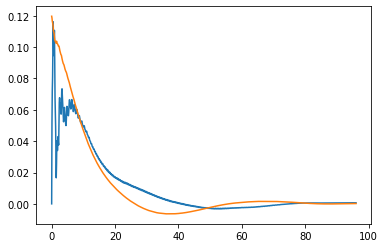

In [6]:
colors = ['#ddd09a','#c55074','#4fc4c1','#5c1f4b','#e2c9ed']
time = np.linspace(0,96,1e3)
F, H = get_F_H(rhoBetas,rho,time)
invArea = 1.0/np.trapz(F,time); normF = [invArea*x for x in F]; plt.plot(time,normF);
invArea = 1.0/np.trapz(H,time); normH = [invArea*x for x in H]; plt.plot(time,normH);
# plt.plot(time,F); plt.plot(time,H);


In [7]:
def simpleGASKET(rhoBetas,rho,time,alphas,betas):
    print("Simple GASKET")
    print("-------------")
    invArea = 1.0/np.trapz(rho,rhoBetas)
    rho     = [invArea * x for x in rho]
    F, H    = get_F_H(rhoBetas,rho,time)

    tmin, tmax = 0, time[-1]
    ftable = interp1d(time,F,kind=0,fill_value=(0.0,0.0), bounds_error=False)
    htable = interp1d(time,H,kind=0,fill_value=(0.0,0.0), bounds_error=False)

    sab       = [0.0]*len(betas)*len(alphas)
    alpha_exp = [exp(-alpha*H[0]) for alpha in alphas] # H[0] = debye waller 
    beta_exp  = [exp(beta*0.5)    for beta  in betas ] # This is to turn the scattering law to be symmetric
    for a,alpha in enumerate(alphas):
        print('alpha = ',alpha)
        alpha_H_exp = [exp(alpha*htable(time[t])) for t in range(len(time))]
        sin_alpha_F = [sin(alpha*ftable(time[t])) for t in range(len(time))]
        cos_alpha_F = [cos(alpha*ftable(time[t])) for t in range(len(time))]
        for b,beta in enumerate(betas):
            #print('     ',beta)
            integrand = [alpha_H_exp[t] * cos_alpha_F[t] * cos(beta*time[t]) \
                       - alpha_H_exp[t] * sin_alpha_F[t] * sin(beta*time[t]) \
                       - cos(beta*time[t]) for t in range(len(time))]
            sab[b+a*len(betas)] = np.trapz(integrand,time) * alpha_exp[a] * beta_exp[b] / pi
    return sab,H,F


In [8]:
def quadGASKET(rhoBetas,rho,time,alphas,betas):
    print("Quad GASKET")
    print("-----------")
    invArea = 1.0/np.trapz(rho,rhoBetas)
    rho     = [invArea * x for x in rho]
    F, H    = get_F_H(rhoBetas,rho,time)

    tmin, tmax = 0, time[-1]
    ftable = interp1d(time,F,kind=1,fill_value=(0.0,0.0), bounds_error=False)
    htable = interp1d(time,H,kind=1,fill_value=(0.0,0.0), bounds_error=False)

    sab       = [0.0]*len(betas)*len(alphas)
    beta_exp  = [exp(beta*0.5)    for beta  in betas ] # This is to turn the scattering law to be symmetric
    getDbw = lambda t,alpha: -exp(-alpha*H[0])
    getQ   = lambda t,alpha:  cos(alpha*ftable(t))*exp(-alpha*(H[0]-htable(t)))
    getR   = lambda t,alpha:  sin(alpha*ftable(t))*exp(-alpha*(H[0]-htable(t)))

    for a,alpha in enumerate(alphas):
        print('alpha = ',alpha)
        alpha_H_exp = [exp(alpha*htable(time[t])) for t in range(len(time))]
        sin_alpha_F = [sin(alpha*ftable(time[t])) for t in range(len(time))]
        cos_alpha_F = [cos(alpha*ftable(time[t])) for t in range(len(time))]
        for b,beta in enumerate(betas):
            #print('     ',beta)
            Qint, err1 = quad(getQ,  tmin, tmax, args=(alpha,), weight='cos', wvar=beta)#, epsabs=1e-5)
            Q2int,err1 = quad(getDbw,tmin, tmax, args=(alpha,), weight='cos', wvar=beta)#, epsabs=1e-5)
            Rint, err2 = quad(getR,  tmin, tmax, args=(alpha,), weight='sin', wvar=beta)#, epsabs=1e-5)
            sab[b+a*len(betas)] = (Qint+Q2int-Rint)/pi * beta_exp[b]

    return sab,H,F


In [ ]:
misccolors = ['#1f77b4','#aec7e8','#ff7f0e','#ffbb78','#2ca02c','#98df8a',\
    '#d62728','#ff9896','#9467bd','#c5b0d5','#8c564b','#c49c94','#e377c2',\
    '#f7b6d2','#7f7f7f','#c7c7c7','#bcbd22','#dbdb8d','#17becf','#9edae5']

alphas = [1e-5,1e-4,1e-3,1e-2,0.1]#,1.0,5.0,8.0,10.0,20.0]
betas  = list(np.linspace(0,10,41))

NT1 = 1e3; time1 = np.linspace(0,94,NT1)

sab1,H,F = simpleGASKET(rhoBetas,rho,time1,alphas,betas)
sab2,H,F = quadGASKET(rhoBetas,rho,time1,alphas,betas)


Simple GASKET
-------------
alpha =  1e-05
alpha =  0.0001
alpha =  0.001
alpha =  0.01
alpha =  0.1
Quad GASKET
-----------
alpha =  1e-05


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


alpha =  0.0001


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


alpha =  0.001
alpha =  0.01


In [ ]:

scalarMap = prepPlot(alphas);  plt.clf()
colorList = [colors.rgb2hex(scalarMap.to_rgba(i)) for i in range(len(alphas))]
mymap = colors.ListedColormap(colorList)
colorBar = plt.contourf([[0,0],[0,0]], list(range(len(alphas)+1)), cmap=mymap)
plt.clf()
cbar = plt.colorbar(colorBar); cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(["    "+str(a) for a in alphas[:]]):
    cbar.ax.text(1.7,(2*j+1)/(2*len(alphas)),lab,ha='center',va='center')

for a in range(len(alphas)):
    plt.plot(betas[:-2],[sab1[b+a*len(betas)] for b in range(len(betas)-2)],\
             color=scalarMap.to_rgba(a),linewidth=1.5,alpha=0.8,linestyle='solid')
    plt.plot(betas[:-2],[sab2[b+a*len(betas)] for b in range(len(betas)-2)],\
             color=scalarMap.to_rgba(a),linewidth=1.5,alpha=0.8,linestyle='dashed')

plt.title('Solid = normal gasket, dashed = quad')
plt.yscale('log')
plt.show()
